# Goover's algorithm to find the minimum

The basic idea is to use the groover's algorithm multiple times changing the orcale function as follows:
![](https://raw.githubusercontent.com/zommiommy/quantum_research/master/Minimum_Spanning_Tree/imgs/schmatics.png?token=AX9E8xNxudIRVGJxQNEhg0k_7tYyVJGqks5cO2X1wA%3D%3D)

# Libraries Imports

In [1]:
import random
import numpy as np
from quantumsystem import QuantumSystem

In [2]:
random.seed(42)
np.random.seed(42)

# Initialization of the system

In [3]:
q = QuantumSystem()
q.set_n_of_qbits(3)

<IPython.core.display.Math object>

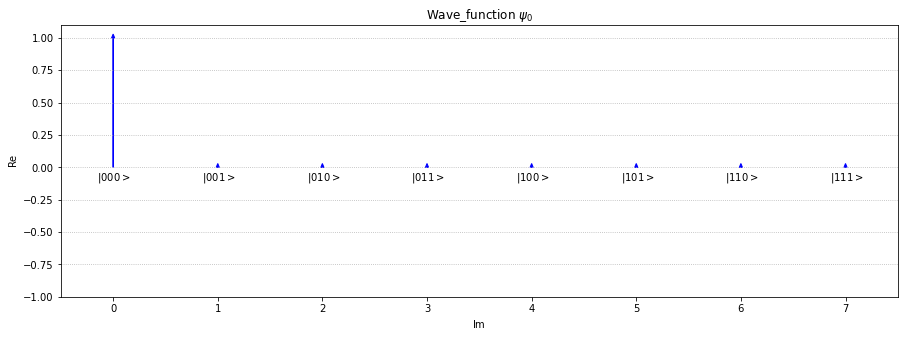

/home/zommiommy/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


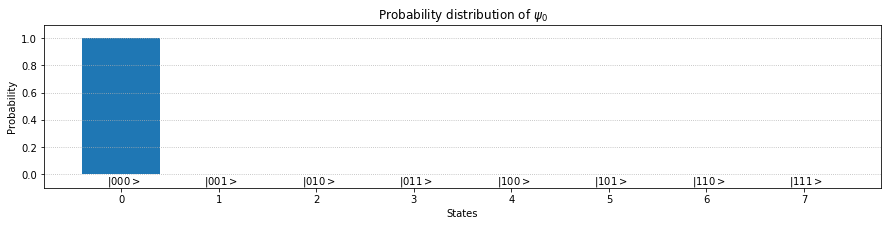

In [4]:
q.initialize_wave_function()

# Creation of a toy example of a set of number

Since we have $Q$ qbits we can rappresent $2^Q$ numbers, N = $[0, 2^Q-1]$ to create a toy dataset we can choose $n$ numbers from this set:

In [5]:
n_of_samples = 3

In [6]:
dataset = np.random.choice(q.n_of_states, n_of_samples, replace=False)
print(dataset)

[1 5 0]


# Creation of the Oracle $O_f$ to filter the data
The oracle can be rappresented as an identity matrix of dimension $(2^Q, 2^Q)$ where the the sign is filpped on the state that we want to keep.

In [7]:
oracle = np.matrix(np.eye(q.n_of_states))
for v in dataset:
    oracle[v,v] = -1

# Definition of the single gover's step

In [8]:
q.disable_printing()

In [9]:
def grovers_step(oracle):
    q.H()
    q.apply_function(oracle,"O_f")
    q.H()
    q.X()
    q.CZ()
    q.X()
    q.H()
    q.print_matrix(q.wave_function)
    q.print_wave_function()

# Definition of the grover's algorithm

In [10]:
def grovers_algorithm(oracle, n_of_samples):
    number_of_iterations = (np.pi/4)*(q.n_of_states/n_of_samples)**0.5
    for _ in range(int(number_of_iterations)):
        grovers_step(oracle)

# Test

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

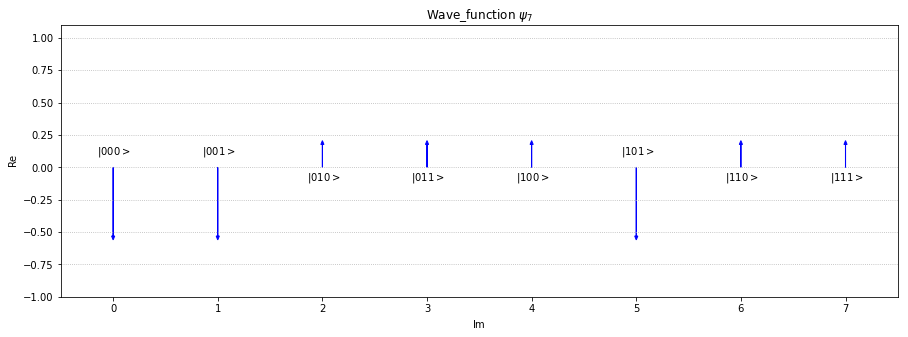

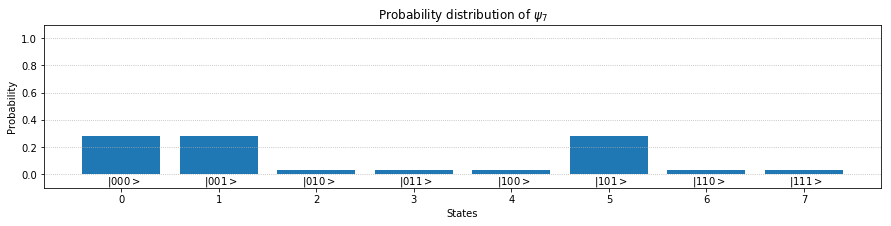

In [11]:
grovers_algorithm(oracle, n_of_samples)

# Definition of a second Oracle

In [12]:
oracle = np.matrix(np.eye(q.n_of_states))
j = np.argmax(np.square(q.wave_function))
for v in dataset:
    if v <= j:
        oracle[v,v] = -1
q.print_matrix(oracle)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

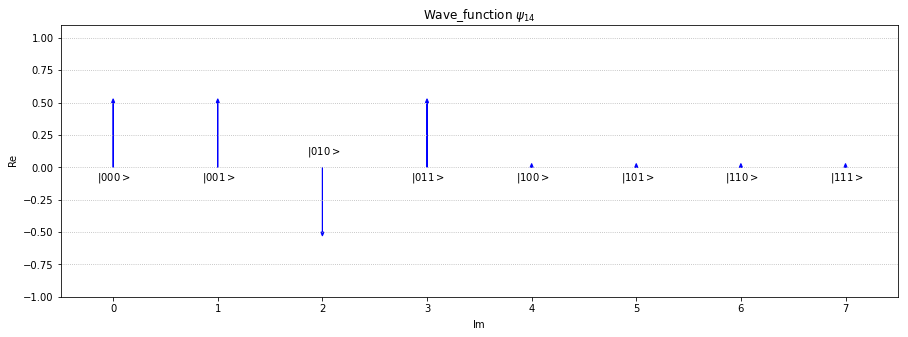

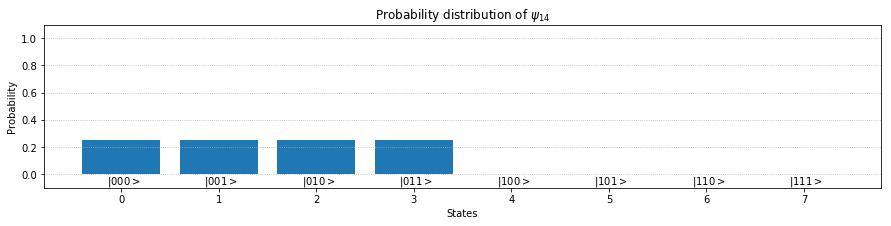

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

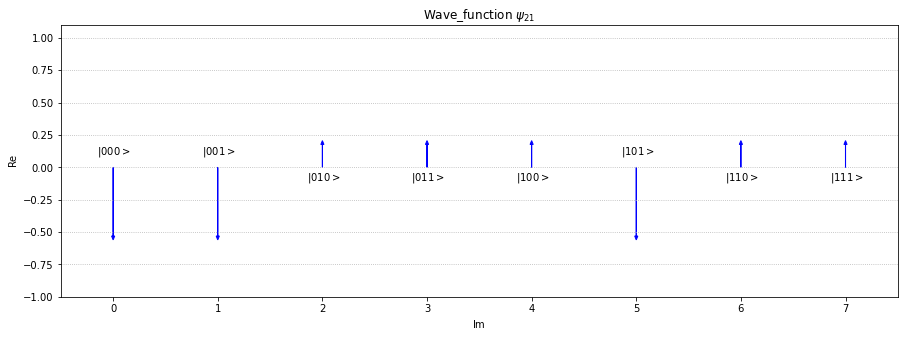

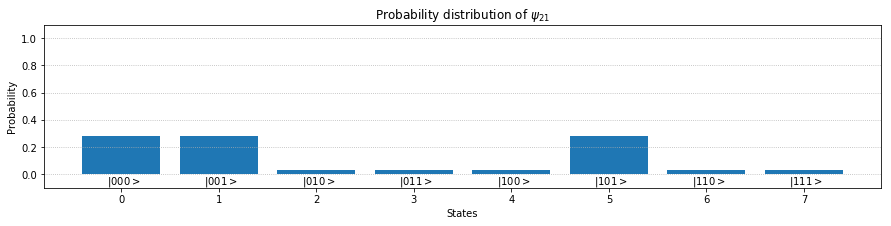

In [13]:
grovers_algorithm(oracle, 1)